In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import main

nlp = spacy.load("pl_core_news_lg")
nlp.add_pipe('spacytextblob')
list_of_posts1 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_agh.txt") #88k obserwujących
list_of_posts2 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_uj.txt") #100k obserwujących
list_of_posts3 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_uw.txt") #175k obserwujących
list_of_posts4 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_pw.txt") #103k obserwujących
list_of_posts5 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_pg.txt") #56k obserwujących
list_of_posts6 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_uam.txt") #60k obserwujących
list_of_posts7 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_umk.txt") #34k obserwujących


('Jak idiota dałem się zrobić na 370 zł', '414')
('CBA dostało zakaz używania Pegasusa. Co teraz?', '68')
('Anti5G necklaces found to be radioactive', '255')
('Odpowiadamy na pytania, które mieliście odnośnie kluczy U2F. Jak działają, jak poprawnie je skonfigurować, no i oczywiście czemu hakerzy ich nienawidzą :) Sorry za miniaturę, robimy mały test :D PS. Warto obejrzeć do końca...', '367')
('', '144')
('Hermetyczne, ale cudowne!', '701')
('Jeśli zależy Ci na bezpieczeństwie bliskich, to kup im pod choinkę klucz U2F Dzięki niemu, nawet jeśli złapią się na phishing i podadzą cyberprzestępcy swoje hasło, to nic im się nie stanie Kupić można tu: https:  lnkd.in gttrE8UU ', '52')
('Mega porada na dziś: JAK ZROBIĆ KOMUŚ DOWCIP NA LINKEDIN W 3 KROKACH! KROK PIERWSZY: A ZACZNIJ OD Zobacz więcej', '1741')
('Męczycie nas o Black Friday. Nie planowaliśmy, ale niech będzie. Nasz bestsellerowy Kurs OSINT Praktyka. Dużo praktyki. Ciągłe aktualizacje. I wieczysty dostęp Za 500 zeta mniej z kodem BF

In [4]:
list_org1 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_otwarte_klatki.txt")
list_org2 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_wedel.txt")
list_org3 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_mbank.txt")
list_org4 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_budimex.txt")
list_org5 = main.get_ready_list_of_posts_with_reactions_linkedin("data_linkedin/linkedin_santander.txt")

list_of_lists = [list_of_posts1, list_of_posts2, list_of_posts3, list_of_posts4, list_of_posts5, list_of_posts6, list_of_posts7, list_org1, list_org2, list_org3, list_org4, list_org5]

In [5]:
import pandas as pd

list_all_posts = []
for list in list_of_lists:
    for post in list:
        list_all_posts.append(post[0])

list_all_reactions = []
for list in list_of_lists:
    for post in list:
        list_all_reactions.append(int(post[1]))

list_average_reactions = []
for list in list_of_lists:
    count = 0
    for post in list:
        count += int(post[1])

    reactions_average = count / len(list)

    for post in list:
        list_average_reactions.append(reactions_average)

list_index_all_reactions = [] #index means all reactions / average for page
for list in list_of_lists:
    count = 0
    for post in list:
        count += int(post[1])

    reactions_average = count / len(list)

    for post in list:
        list_index_all_reactions.append(int(post[1]) / reactions_average)

In [6]:
import matplotlib.pyplot as plt
list_all_polarity = []

for list in list_of_lists:
    for post in list:
        doc = nlp(post[0])
        list_all_polarity.append(doc._.polarity)

print(list_all_polarity[1000])

list_all_subjectivity = []

for list in list_of_lists:
    for post in list:
        doc = nlp(post[0])
        list_all_subjectivity.append(doc._.subjectivity)

print(list_all_polarity[1000])


0.0
0.0


In [7]:
list_all_similarity_to_best = []

most_popular_post = ['text','0']
for list in list_of_lists:
    for post in list:
        if int(post[1]) > int(most_popular_post[1]):
            most_popular_post = post

print(most_popular_post)

most_popular_post_doc = nlp(most_popular_post[0])

for list in list_of_lists:
    for post in list:
        doc = nlp(post[0])
        list_all_similarity_to_best.append(doc.similarity(most_popular_post_doc))

print(list_all_similarity_to_best[1000])

(' Michał Styczyński , doktorant na Wydziale Biologii, odkrył substancję pochodzenia naturalnego z grupy melanin, której przemysłowa produkcja mogłaby wyeliminować syntetyczny składnik kremów z filtrem UV, który przyczynia się do obumierania koralowców. Odkrycie cechuje duży potencjał komercjalizacyjny. Wprowadzenie na rynek odbędzie się przy udziale spinoffu UW Biotemist, który będzie specjalizować się w rozwoju technologii i produkcji substancji pochodzenia naturalnego wytwarzanych przez wyizolowane szczepy bakterii antarktycznych barwników z grupy melanin oraz karotenoidów, a także wielu innych związków o szerokim potencjale aplikacyjnym. Gratulujemy! biologia komercjalizacja spinoff ', '4441')


C:\Users\Kuba\AppData\Local\Temp/ipykernel_15000/1185938718.py:16: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  list_all_similarity_to_best.append(doc.similarity(most_popular_post_doc))


0.8085384848550674


In [8]:
list_post_length = []
list_number_of_ents = []

for post in list_all_posts:
    doc = nlp(post)
    list_post_length.append(len(doc))
    list_number_of_ents.append(len(doc.ents))

print(list_post_length)
print(list_number_of_ents)

[138, 258, 193, 163, 135, 17, 271, 174, 208, 203, 277, 350, 140, 197, 110, 8, 99, 396, 246, 171, 273, 234, 57, 137, 30, 164, 224, 154, 326, 117, 11, 9, 271, 107, 11, 100, 144, 121, 377, 236, 384, 5, 2, 225, 231, 210, 453, 431, 140, 374, 260, 408, 259, 235, 128, 185, 135, 337, 385, 268, 247, 281, 318, 389, 223, 189, 179, 178, 175, 114, 194, 186, 160, 153, 172, 169, 80, 158, 197, 126, 118, 189, 180, 132, 145, 182, 131, 129, 173, 191, 172, 201, 148, 142, 192, 169, 188, 162, 168, 155, 170, 70, 189, 103, 5, 9, 11, 159, 5, 9, 8, 9, 12, 216, 7, 8, 8, 7, 95, 9, 8, 167, 11, 10, 30, 9, 11, 180, 11, 95, 9, 6, 6, 7, 11, 8, 8, 7, 83, 10, 8, 81, 8, 215, 7, 8, 8, 87, 10, 103, 155, 7, 117, 174, 7, 94, 104, 7, 8, 9, 8, 6, 6, 5, 9, 101, 11, 5, 7, 8, 6, 7, 7, 9, 5, 9, 10, 8, 10, 5, 7, 5, 10, 94, 8, 11, 5, 7, 6, 10, 9, 5, 9, 6, 9, 5, 7, 6, 7, 63, 8, 5, 9, 7, 171, 8, 8, 9, 56, 9, 8, 9, 6, 6, 8, 5, 7, 76, 10, 7, 9, 5, 5, 8, 98, 39, 109, 99, 31, 64, 10, 115, 47, 70, 60, 30, 94, 105, 88, 59, 103, 74, 177, 72,

In [16]:
list_preprocessed_posts = []

for post in list_all_posts:
    doc = nlp(post)

    clean_text = " ".join(token.lemma_ for token in nlp(doc) if token.lemma_.lower() not in nlp.Defaults.stop_words and token.is_alpha)
    list_preprocessed_posts.append(clean_text)

In [48]:
list_index_higher_than_1 = []
list_index_higher_than_3 = []

for index in list_index_all_reactions:
    if index < 0.5:
        list_index_higher_than_1.append(1)
    else:
        list_index_higher_than_1.append(0)


for index in list_index_all_reactions:
    if index > 3:
        list_index_higher_than_3.append(1)
    else:
        list_index_higher_than_3.append(0)

In [49]:
#TRAIN BAYES 50 REACTIONS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vec = CountVectorizer()

x1 = list_preprocessed_posts
y1 = list_index_higher_than_1

x1, x_test1, y1, y_test1 = train_test_split(x1, y1, stratify=y1, test_size=0.25, random_state=42)

x1 = vec.fit_transform(x1).toarray()
x_test1 = vec.transform(x_test1).toarray()

model1 = MultinomialNB()
model1.fit(x1, y1)

print(model1.score(x_test1, y_test1))

list_index_higher_than_1_bayes = model1.predict(vec.transform(list_all_posts))

#TRAIN BAYES 100 REACTIONS

x3 = list_preprocessed_posts
y3 = list_index_higher_than_3

x3, x_test3, y3, y_test3 = train_test_split(x3, y3, stratify=y3, test_size=0.25, random_state=42)

x3 = vec.fit_transform(x3).toarray()
x_test3 = vec.transform(x_test3).toarray()

model3 = MultinomialNB()
model3.fit(x3, y3)

print(model3.score(x_test3, y_test3))

list_index_higher_than_3_bayes = model3.predict(vec.transform(list_all_posts))

0.7135549872122762
0.9514066496163683


In [50]:
data = {
    'POSTS' : list_all_posts,
    'REACTIONS' : list_all_reactions,
    'REACTIONS_AVERAGE' : list_average_reactions,
    'INDEX' : list_index_all_reactions,
    'POLARITY' : list_all_polarity,
    'SUBJECTIVITY' : list_all_subjectivity,
    'SIMILARITY_TO_BEST' : list_all_similarity_to_best,
    'POST_LENGTH' : list_post_length,
    'NUMBER_OF_ENTS' : list_number_of_ents,
    'INDEX_HIGHER_THAN_ONE_BAYES' : list_index_higher_than_3_bayes,
    'INDEX_HIGHER_THAN_THREE_BAYES' : list_index_higher_than_3_bayes,
}

df_linkedin = pd.DataFrame(data)

print(df_linkedin.head(30))

                                                POSTS  REACTIONS  \
0   Na terenie AGH rusza budowa budynku D3, w któr...         39   
1   Inżynierowie z Wydziału Elektroniki, Automatyk...        130   
2   Sukces naszych studentów w konkursie EKOinnowa...         49   
3   Grudzień to dobry czas, aby zacząć się zastana...          7   
4   Marzy Ci się przygoda życia? Chcesz zdobyć doś...         35   
5   Fullstack Python Developer Job Fullstack Akade...         36   
6    Maciej Skorupski , student Wydział Inżynierii...         47   
7   Wraz ze spółką GAZSYSTEM po raz kolejny urucha...         24   
8   Macie pomysł na swój biznes, ale nie do końca ...          9   
9   Ponad 30 projektów z AGH otrzymało granty przy...        139   
10  Klimatyczne ABC. Interdyscyplinarne podstawy w...         51   
11  3 listopada zainaugurowaliśmy nowy cykl AGH NA...          8   
12  Serdecznie pragniemy Was zaprosić na V Górnicz...         15   
13  Profesor Vicentiu D. Radulescu pracujący na 

In [11]:
df_linkedin.to_csv('data_linkedin/linkedin_data.csv')

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np
#
# x = []
# y = []
#
# x_org = []
# y_org = []
#
# for list in list_of_lists:
#
#     reacts_count = 0
#     for post in list:
#         reacts_count += int(post[1])
#
#     reacts_average = reacts_count / len(list)
#     print(reacts_average)
#
#     for post in list:
#         if int(post[1]) / reacts_average > 0:
#             doc = nlp(post[0])
#             x.append(len(doc.ents))
#             y.append(int(post[1]) / reacts_average)
#
# for list in list_organizations:
#
#     reacts_count = 0
#     for post in list:
#         reacts_count += int(post[1])
#
#     reacts_average = reacts_count / len(list)
#     print(reacts_average)
#
#     for post in list:
#         if int(post[1]) / reacts_average > 0:
#             doc = nlp(post[0])
#             x.append(len(doc.ents))
#             y.append(int(post[1]) / reacts_average)
#
#
# x_array = np.array(x)
# y_array = np.array(y)
#
# x_org_array = np.array(x_org)
# y_org_array = np.array(y_org)
#
# plt.plot(x_array, y_array, 'bo')
# plt.plot(x_org_array, y_org_array, 'go')
# plt.show()

(array([204., 345., 337., 220., 126.,  80.,  61.,  42.,  36.,  23.,  19.,
         14.,  13.,   6.,   8.,   2.,   5.,   2.,   5.,   0.,   1.,   2.,
          0.,   1.,   0.,   1.,   1.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.59864585e-02, 2.71027436e-01, 5.26068413e-01, 7.81109391e-01,
        1.03615037e+00, 1.29119135e+00, 1.54623232e+00, 1.80127330e+00,
        2.05631428e+00, 2.31135526e+00, 2.56639623e+00, 2.82143721e+00,
        3.07647819e+00, 3.33151917e+00, 3.58656014e+00, 3.84160112e+00,
        4.09664210e+00, 4.3516

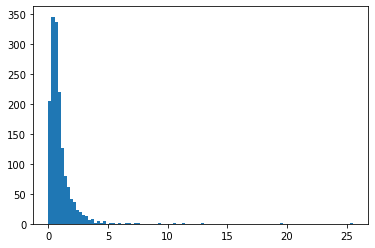

In [13]:
dict = {}
hist_list = []

for reactions in df_linkedin.INDEX:
    if reactions not in dict.keys():
        dict[reactions] = 1
    else:
        dict[reactions] += 1
    hist_list.append(reactions)

# print(dict)

x = dict.keys()
y = dict.values()

plt.hist(hist_list, 100)

Training data set length=1250
Testing data set length=314


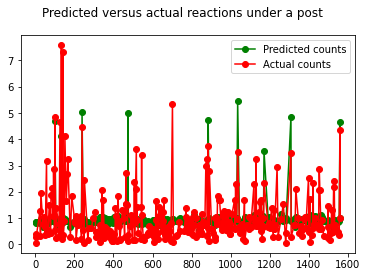

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  INDEX   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1503.5
Date:                Mon, 03 Jan 2022   Deviance:                       840.77
Time:                        15:09:36   Pearson chi2:                 1.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1829
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [51]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

mask = np.random.rand(len(df_linkedin)) < 0.8
df_train = df_linkedin[mask]
df_test = df_linkedin[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

expr = """INDEX ~ POLARITY + SUBJECTIVITY + POST_LENGTH + NUMBER_OF_ENTS + SIMILARITY_TO_BEST + INDEX_HIGHER_THAN_ONE_BAYES + INDEX_HIGHER_THAN_THREE_BAYES"""

# expr = """INDEX ~ POLARITY + SUBJECTIVITY + POST_LENGTH + NUMBER_OF_ENTS + SIMILARITY_TO_BEST + INDEX_HIGHER_THAN_ONE_BAYES + INDEX_HIGHER_THAN_THREE_BAYES"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
# print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['INDEX']
fig = plt.figure()
fig.suptitle('Predicted versus actual reactions under a post')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

print(poisson_training_results.summary())

<Figure size 432x288 with 0 Axes>

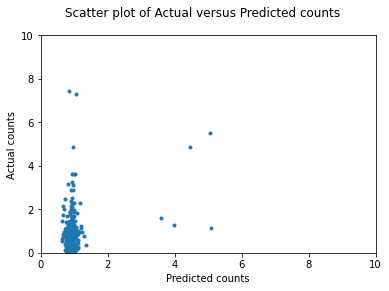

In [42]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()